In [16]:
#import required packages
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("CardioGoodFitness.csv")

# take a look at the dataset
df.head()



,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [3]:
# summarize the data
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [14]:
df.describe(include='O').T
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,180,3,TM195,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,180,NaN,NaN,NaN,28.7889,6.9435,18,24,26,33,50
Gender,180,2,Male,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,180,NaN,NaN,NaN,15.5722,1.61705,12,14,16,16,21
MaritalStatus,180,2,Partnered,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,180,NaN,NaN,NaN,3.45556,1.0848,2,3,3,4,7
Fitness,180,NaN,NaN,NaN,3.31111,0.958869,1,3,3,4,5
Income,180,NaN,NaN,NaN,53719.6,16506.7,29562,44058.8,50596.5,58668,104581
Miles,180,NaN,NaN,NaN,103.194,51.8636,21,66,94,114.75,360


In [ ]:
#check for null values
df.isnull().sum()

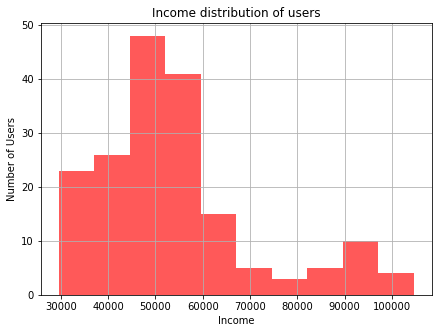

In [7]:
#Histogram of Income for users
df['Income'].hist( figsize=(7, 5),bins=10,
          alpha=0.65,color='red')
plt.title('Income distribution of users') # add a title to the histogram
plt.ylabel('Number of Users') # add y-label
plt.xlabel('Income') # add x-label
plt.show()

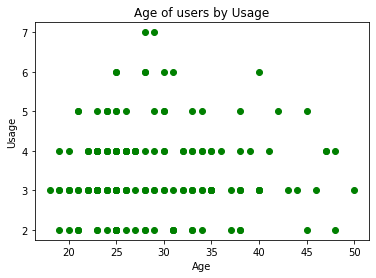

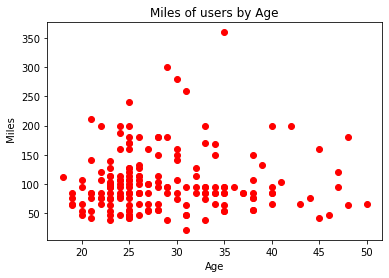

In [12]:
# plot line graph of Age on Usage 
plt.scatter( df.Age, df.Usage ,  color='green')
plt.title('Age of users by Usage')
plt.xlabel("Age")
plt.ylabel("Usage")
plt.show()

# plot line graph of Age on Miles
plt.scatter( df.Age, df.Miles ,  color='red')
plt.title('Miles of users by Age')
plt.xlabel("Age")
plt.ylabel(" Miles")
plt.show()

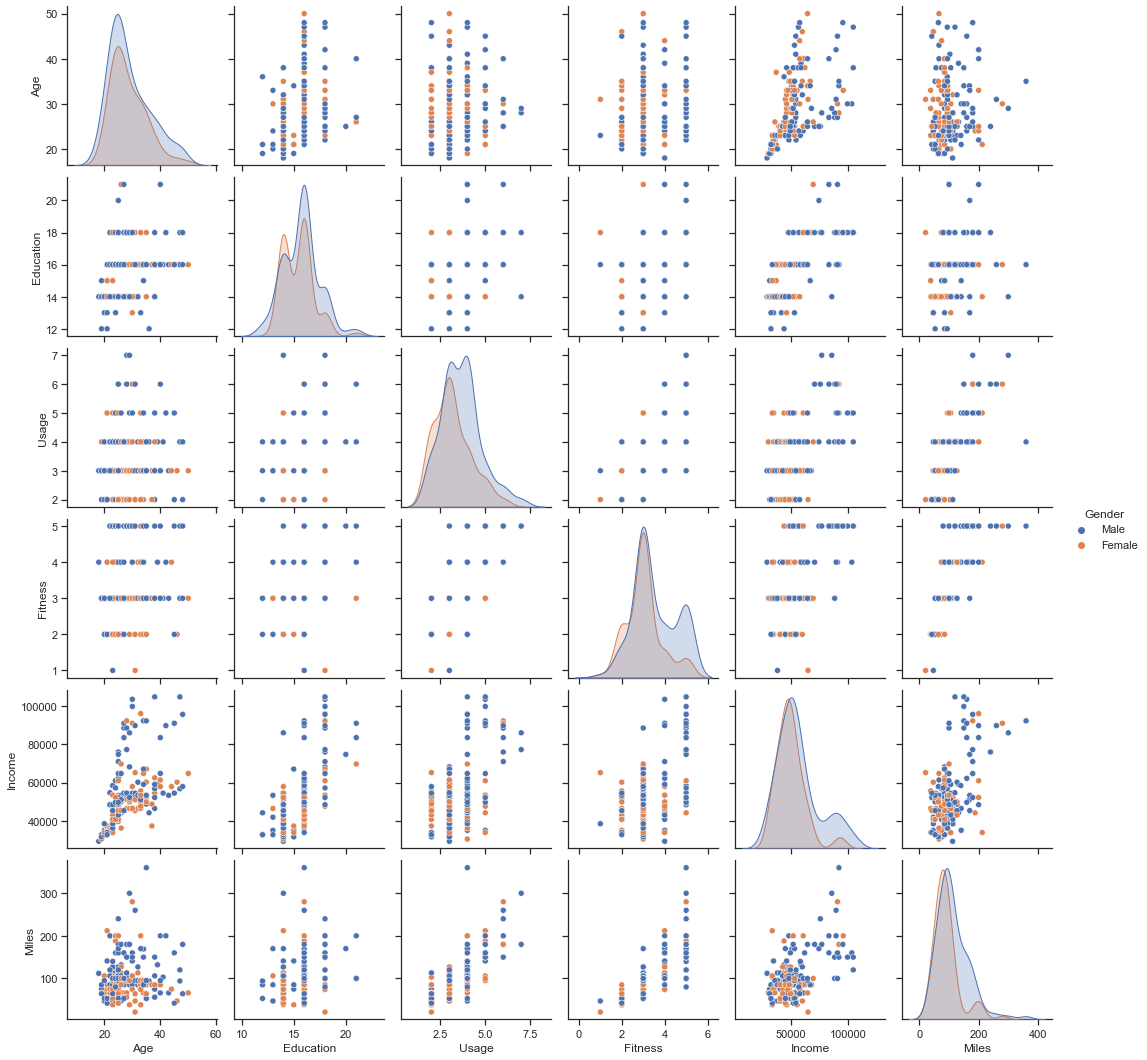

In [34]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df,hue ='Gender')
plt.show()

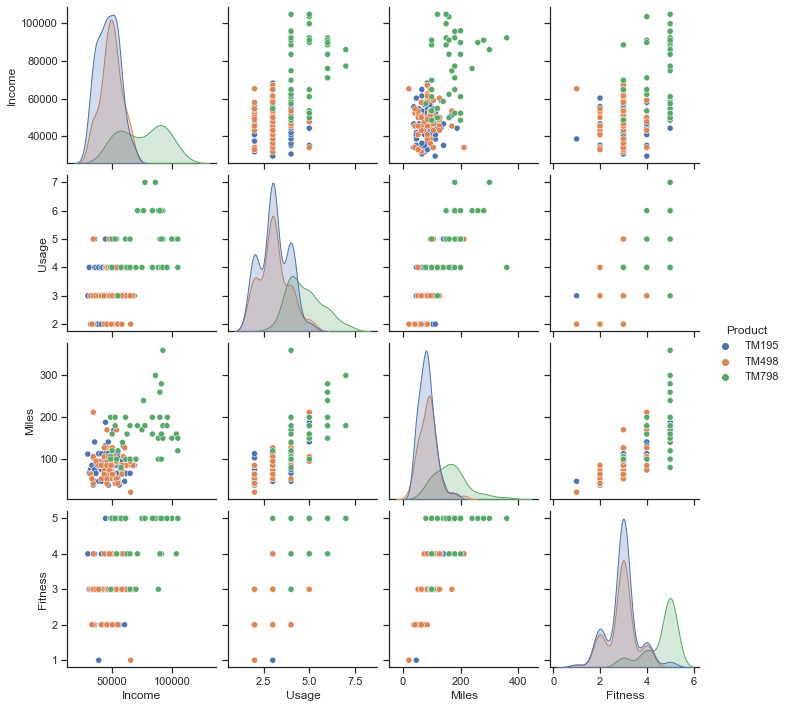

In [38]:
#Plotting by Product with a selected list of variables
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df,vars=['Income', 'Usage', 'Miles', 'Fitness'],hue ='Product')
plt.show()

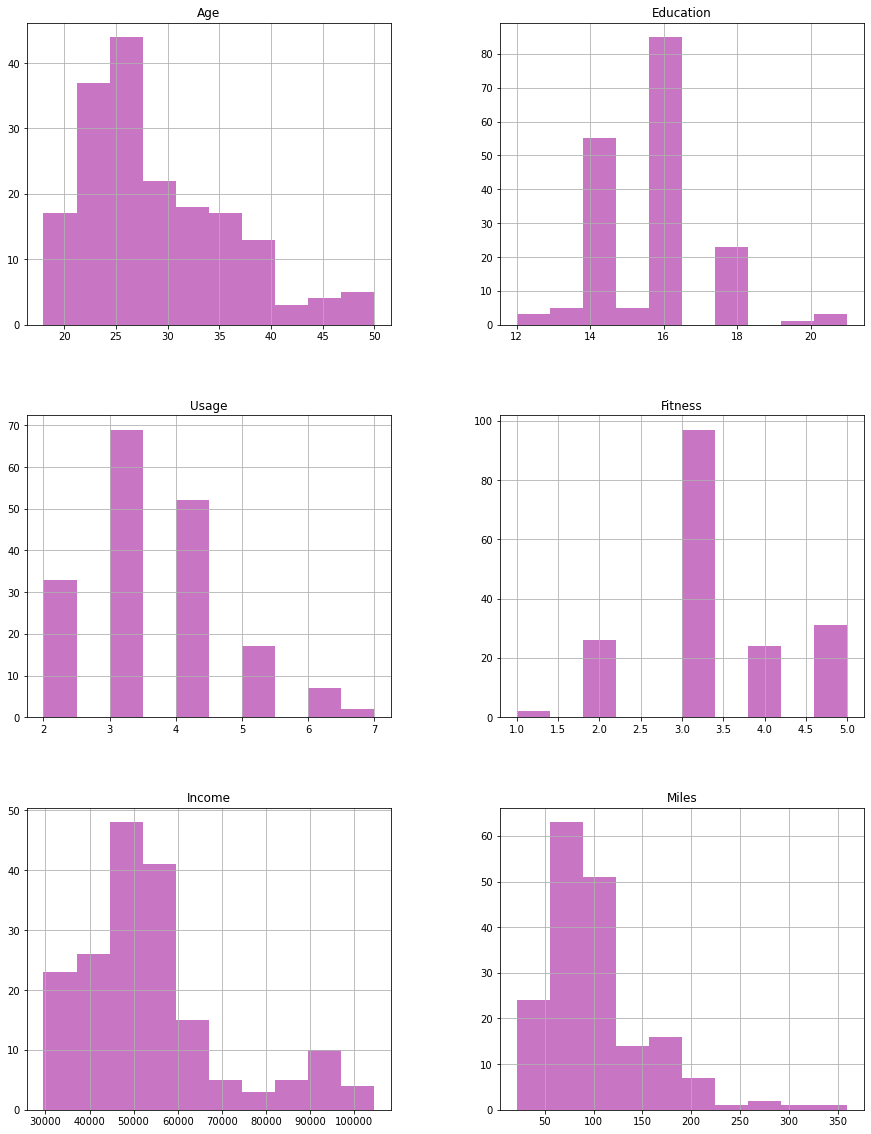

In [29]:
df.hist(figsize=(15,20),color= '#C875C4')
plt.show()

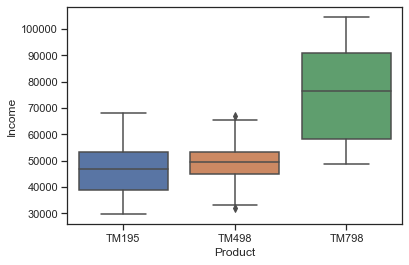

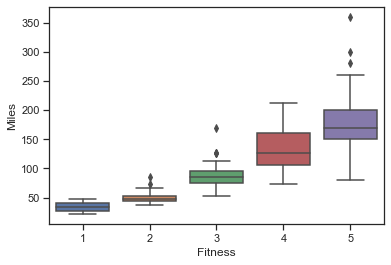

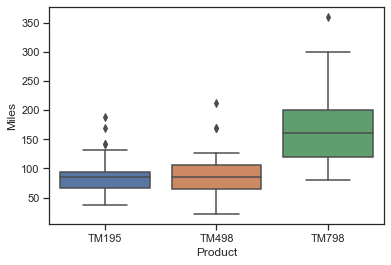

In [47]:
sns.boxplot(y="Income", x="Product", data=df, )
plt.show()
#boxplot on Income of Users by product
sns.boxplot(y="Miles", x="Fitness", data=df, )
plt.show()
#boxplot on Miles of Users by Fitness
sns.boxplot(y="Miles", x="Product", data=df, )
plt.show()
#boxplot on Miles of Users by Product

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64


/Users/paulinusjua/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


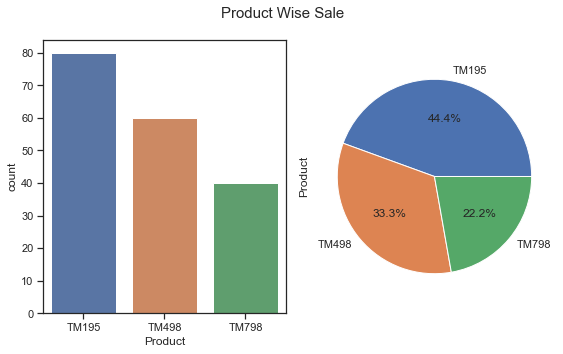

In [70]:
#users count by product
print(df.Product.value_counts())
#
def plot_uni_cat(d):
    f,ax = plt.subplots(nrows=1,ncols=2,figsize=(8,5))
    f.suptitle(d.name+' Wise Sale',fontsize=15)
    sns.countplot(d,ax=ax[0])
    d.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1])
    plt.tight_layout()
plot_uni_cat(df['Product'])

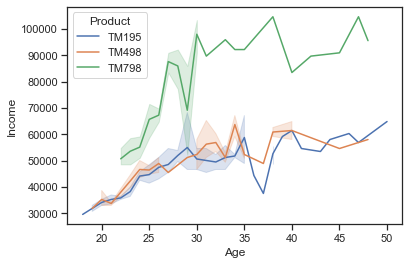

In [49]:
sns.lineplot(data=df, x='Age', y='Income', hue="Product")
plt.show()
#Age versuS Income by product

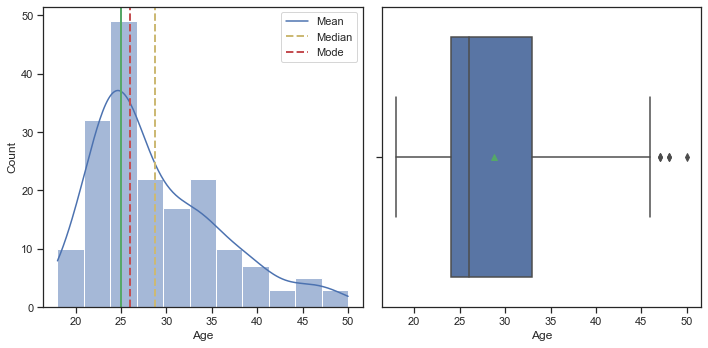

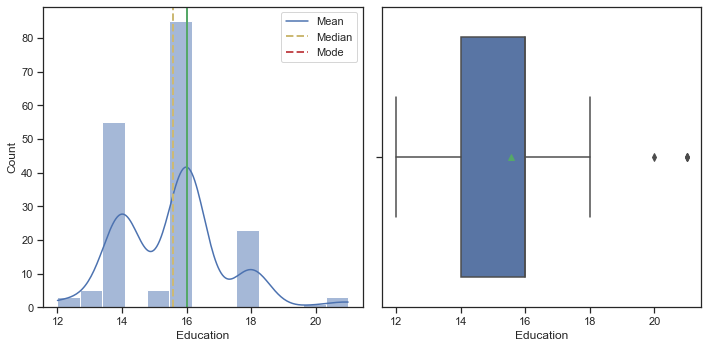

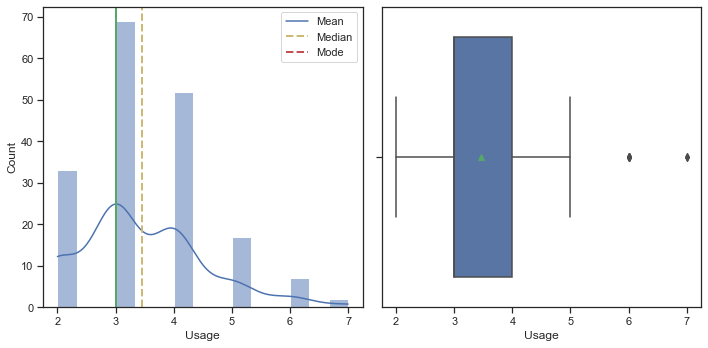

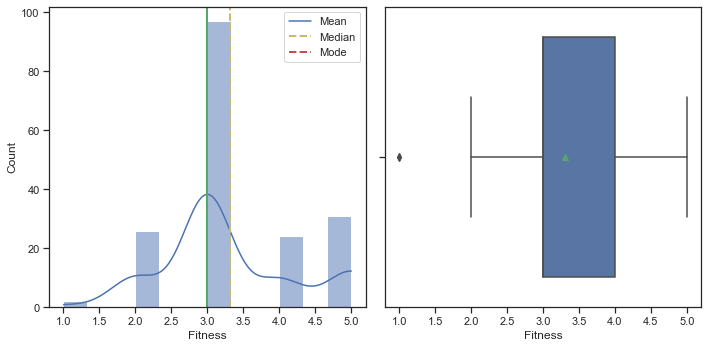

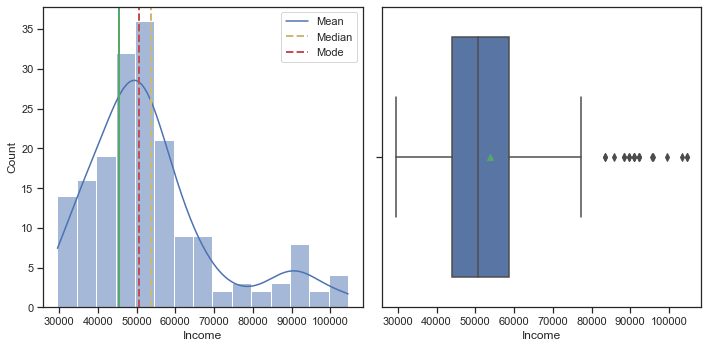

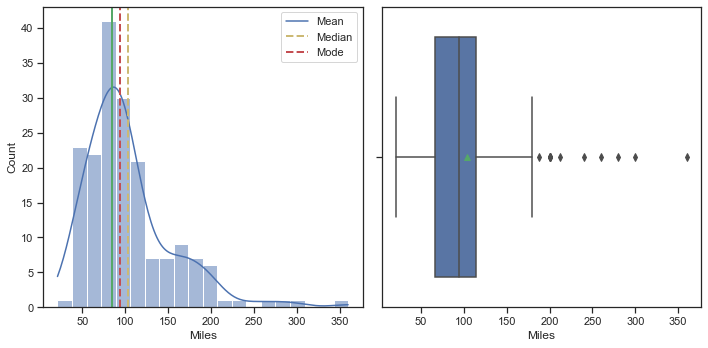

In [71]:

#descriptive statistics mean.median.mode numeric variables
def plot_uni(d):
    f,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
    sns.histplot(d, kde=True, ax=ax[0])
    ax[0].axvline(d.mean(), color='y', linestyle='--',linewidth=2)
    ax[0].axvline(d.median(), color='r', linestyle='dashed', linewidth=2)
    ax[0].axvline(d.mode()[0],color='g',linestyle='solid',linewidth=2)
    ax[0].legend({'Mean':d.mean(),'Median':d.median(),'Mode':d.mode()})
    
    sns.boxplot(x=d, showmeans=True, ax=ax[1])
    plt.tight_layout()
    
#
num_cols = df.select_dtypes('int64').columns.values
num_cols
#
for f in num_cols:
    plot_uni(df[f])

In [66]:
#correlation matrix
corr = df.corr()
corr


,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


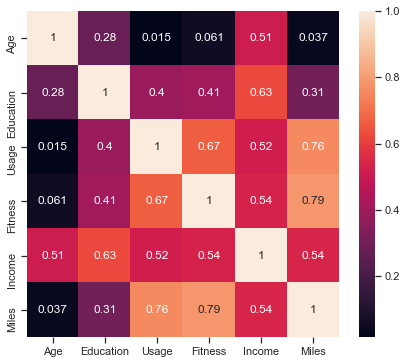

In [65]:
#corr matrix graph
plt.figure(figsize=(7, 6))
sns.heatmap(corr, annot=True)
plt.show()